In [1]:
import numpy as np
import cvxpy as cp
import osbdo as ob

In [2]:
import time
import random
np.random.seed(0) 
random.seed(0)

# Problem description
section 4.1 in https://web.stanford.edu/~boyd/papers/os_bundle_distr_opt.html 

# Create parameters

In [3]:
# ms = [5, 5, 12, 10, 6]
# ns = [5, 12, 10, 6, 9]
ms = [20, 30, 40, 25, 35]
ns = [30, 40, 25, 35, 20]
params = ob.sc_params(ms, ns)

# Distributed solution

In [4]:
agents = ob.sc_agents(params)
g = ob.sc_coupling(params, agents)
prob = ob.Problem(agents = agents, g = g)

In [5]:
ob.add_extra_methods_to_problem(prob)

In [6]:
best_params = (1, 0.5, 0.1, 10)

In [7]:
max_iter = 150
start_time = time.time()
# best_params = (1, 0.5, 0.1, 10)
x_agent, x_global = prob.solve_doubly_stabilized(ds_params=best_params, rel_gap=10**(-5), abs_gap=10**(-5),\
                                                  max_iter=max_iter, memory=max_iter, tol=1e-6, print_freq=20)
print(f"elapsed time = {time.time() - start_time}")

k=0, rel_gap=inf, L=-2074.3559134842617, U=4409.906115002427, L0=-2074.3559134842617
   null step: tau_k=0.5000005, mu_k=1.0000000000082658, L_k=-2074.3559134842617, l_k=1167.7751007590828
k=20, rel_gap=inf, L=-384.3271618375411, U=58.29868364397851, L0=-384.3271618375411
   null step: tau_k=0.004773293565273095, mu_k=2.166624106243595, L_k=-2074.3559134842617, l_k=-314.71856566600394
k=40, rel_gap=1.0757718918738457, L=-124.31297057564598, U=-59.887587389684654, L0=-124.31297057564598
   descent step: tau_k=0.003291211526870509, mu_k=1.94270401819747, L_k=-2074.3559134842617, l_k=-83.20116547155855
k=60, rel_gap=0.1772477403167907, L=-91.42753063332714, U=-77.66209906567713, L0=-91.42753063332714
   null step: tau_k=0.00012806809432372942, mu_k=1.0000000003937277, L_k=-2074.3559134842617, l_k=-80.57629632591136


/Users/parshakova.tanya/opt/anaconda3/envs/osbdo/lib/python3.9/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


k=80, rel_gap=0.09531844395160989, L=-88.13637433247618, U=-80.46643861350879, L0=-88.13637433247618
   null step: tau_k=4.7957603012224764e-05, mu_k=16.62713459200249, L_k=-2074.3559134842617, l_k=-81.19498792856734
k=100, rel_gap=0.08805429478365905, L=-87.87864328234264, U=-80.76678131197102, L0=-87.87864328234264
   null step: tau_k=1.213522413709709e-05, mu_k=10.540735814794667, L_k=-2074.3559134842617, l_k=-80.85784997635334
k=120, rel_gap=0.08739550688817127, L=-87.8254351044568, U=-80.76678131197102, L0=-87.82543778531681
   null step: tau_k=1.000010619377267e-06, mu_k=3.034890227485949, L_k=-2074.3559134842617, l_k=-80.78954847806659
k=140, rel_gap=0.08739522848231938, L=-87.82541261851225, U=-80.76678131197102, L0=-87.82541635997723
   null step: tau_k=1.0000000000101273e-06, mu_k=3.1843603614844853, L_k=-2074.3559134842617, l_k=-80.78954847806659
rel_gap=0.08739505380388601, L=-87.82539851029742, L_k=-2074.3559134842617, U=-80.76678131197102, l_k=-80.78954847806659
elapsed t

In [8]:
prob.lower_bnd[-1], prob.upper_bnd[-1]

(-87.82539851029742, -80.76678131197102)

# Centralized solution

In [9]:
h_cvx, x_cvx, prob_cvx = ob.cvx_supply_chain(params=params)

In [10]:
h_cvx, prob.upper_bnd[-1]

(-81.1232713273431, -80.76678131197102)

In [11]:
assert prob.lower_bnd[-1] - 1e-8 <= h_cvx <= 1e-8 + prob.upper_bnd[-1], print(prob.lower_bnd[-1], h_cvx, prob.upper_bnd[-1])

# Plot

i=79, omega_k=0.09534536457290926, omega_true=0.008096723703164195


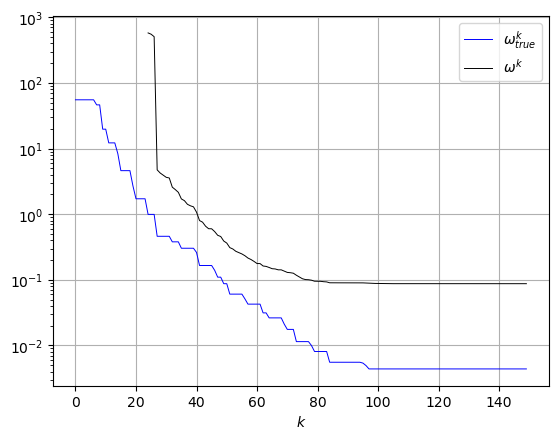

In [12]:
ob.plot_true_rel_gap_uk(lk = prob.lower_bnd, uk = prob.upper_bnd, h_true = h_cvx, file_name='sc_doubly_stab.pdf')

i=79, omega_k=0.09534536457290926, omega_true=0.008096723703164195


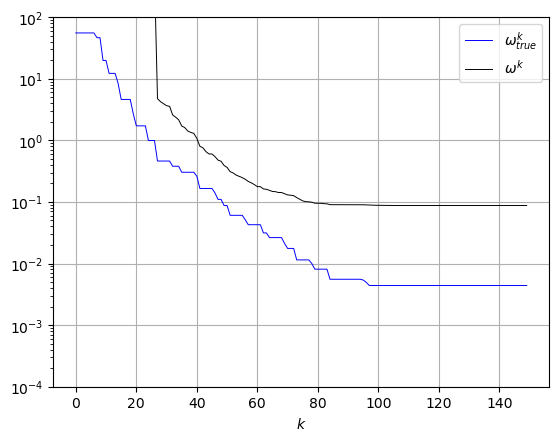

In [13]:
ob.plot_true_rel_gap_uk(y_min=1e-4, y_max=1e2, lk = prob.lower_bnd, uk = prob.upper_bnd, h_true = h_cvx, file_name='sc_dsbm_bounds.pdf')